In [35]:
import pandas as pd
from sklearn import linear_model
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

data = pd.read_csv("NAS.csv")
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
5,2003-12-25,NaN,NaN,NaN,NaN,NaN,NaN
6,2003-12-26,NaN,NaN,NaN,NaN,NaN,NaN
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
9,2003-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4253 entries, 0 to 4252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4253 non-null   object 
 1   Open       4218 non-null   float64
 2   High       4218 non-null   float64
 3   Low        4218 non-null   float64
 4   Close      4218 non-null   float64
 5   Adj Close  4218 non-null   float64
 6   Volume     4218 non-null   float64
dtypes: float64(6), object(1)
memory usage: 232.7+ KB


In [37]:
data.isnull().sum()

Date          0
Open         35
High         35
Low          35
Close        35
Adj Close    35
Volume       35
dtype: int64

<AxesSubplot:>

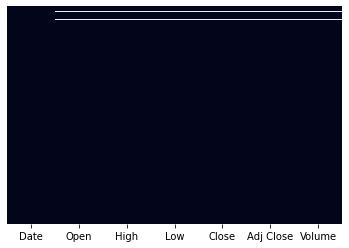

In [38]:
sns.heatmap(data.isnull(), yticklabels=False, cbar = False)

In [39]:
data.dropna(inplace = True)

<AxesSubplot:>

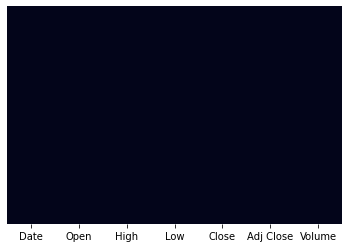

In [40]:
sns.heatmap(data.isnull(), yticklabels=False, cbar = False)

In [41]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [42]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
11,2004-01-02,17.940001,18.054300,17.768600,17.768600,17.768600,322923.0
12,2004-01-05,18.054300,18.054300,17.711500,17.711500,17.711500,182782.0
13,2004-01-06,17.940001,17.997101,17.597200,17.597200,17.597200,300054.0
14,2004-01-07,17.425800,17.711500,17.140100,17.140100,17.140100,189937.0


In [43]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
4248,2020-10-12,0.7090,0.7100,0.6500,0.6768,0.6768,48320475.0
4249,2020-10-13,0.6768,0.6768,0.6000,0.6006,0.6006,47786200.0
4250,2020-10-14,0.6010,0.6400,0.5962,0.6260,0.6260,37534949.0
4251,2020-10-15,0.6260,0.6260,0.5850,0.6050,0.6050,26737615.0
4252,2020-10-16,0.6050,0.6200,0.6010,0.6106,0.6106,15754218.0


Text(0, 0.5, '$ price')

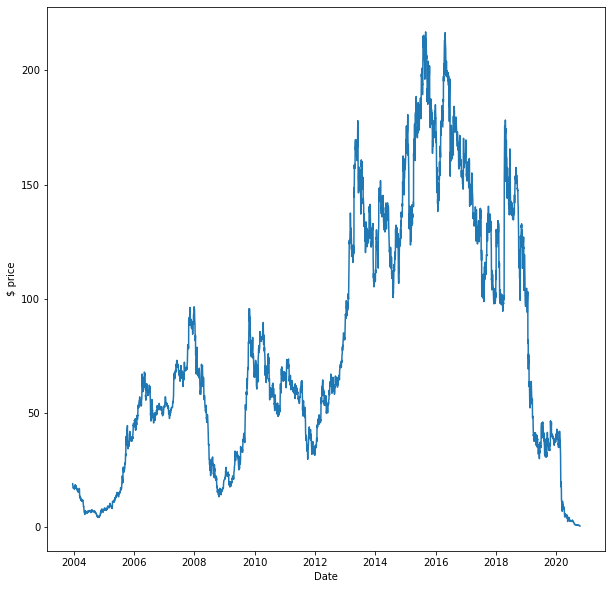

In [44]:
dataPlot = pd.read_csv("NAS.csv", parse_dates=['Date'])

plt.figure(figsize=(10,10))
plt.plot(dataPlot['Date'], dataPlot['Close'])
plt.xlabel("Date")
plt.ylabel("$ price")

In [45]:
value = data.Close
value.head(10)

0     19.139799
1     18.454201
2     18.054300
3     17.425800
7     17.254400
8     17.711500
11    17.768600
12    17.711500
13    17.597200
14    17.140100
Name: Close, dtype: float64

In [46]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(datetime.toordinal)
input = data.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis='columns')
input.head(10)

,Date
0,731567
1,731568
2,731571
3,731572
7,731578
8,731579
11,731582
12,731585
13,731586
14,731587


In [47]:
regObj = linear_model.LinearRegression()
regObj.fit(input, value)

LinearRegression()

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 0 to 4252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4218 non-null   int64  
 1   Open       4218 non-null   float64
 2   High       4218 non-null   float64
 3   Low        4218 non-null   float64
 4   Close      4218 non-null   float64
 5   Adj Close  4218 non-null   float64
 6   Volume     4218 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 263.6 KB


0       731567
1       731568
2       731571
3       731572
7       731578
         ...  
4248    737710
4249    737711
4250    737712
4251    737713
4252    737714
Name: Date, Length: 4218, dtype: int64


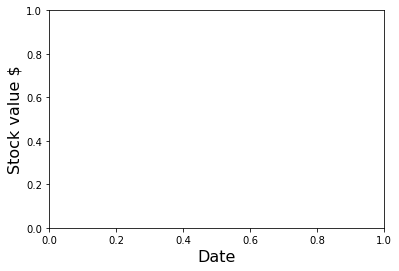

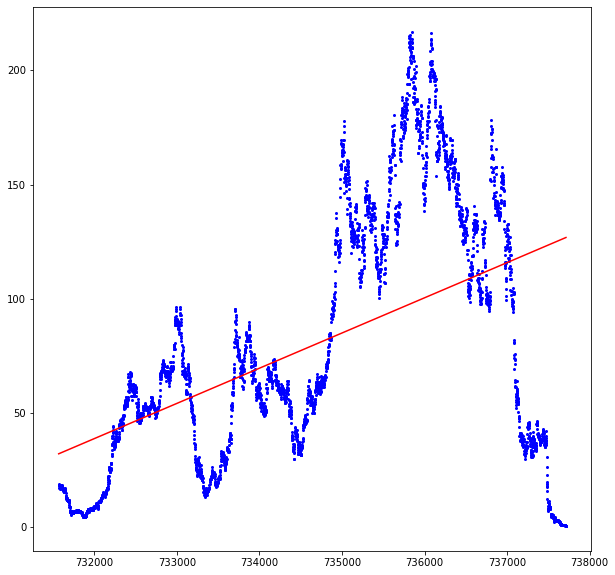

In [53]:
plt.xlabel('Date', fontsize=16)
plt.ylabel('Stock value $', fontsize=16)
plt.figure(figsize=(10,10))

    

print(data['Date'])
plt.scatter(data['Date'], data['Close'], color='blue', s=4)
plt.plot(data['Date'], regObj.predict(data[['Date']]), color='red')

In [50]:
dato = "2025-01-01"
datoObj = datetime.strptime(dato, '%Y-%m-%d')
regObj.predict([[datoObj.toordinal()]])

array([150.54739202])